# Running inferDotNet model from Python

## Introduction

## Setup

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from time import time
from pathlib import Path

### Config

In [3]:
model_dir = Path('../models/coin-toss/')
data_dir = Path('../data/')

## Running Model

In [4]:
cmd = f'dotnet run --project {model_dir} {data_dir} second EP'
cmd

'dotnet run --project ../models/coin-toss ../data second EP'

In [5]:
!{cmd}

====Compiling model...done.
Compiling model...done.

priorFirstCoin : Bernoulli(0,5)
priorSecondCoin: Bernoulli(0,5)
priorBothHeads : Bernoulli(0,25)

postFirstCoin  : Bernoulli(0,5)
postSecondCoin : Bernoulli(1)
postBothHeads  : Bernoulli(0,5)
=

In [6]:
df_result = pd.read_csv(data_dir/'results.csv', sep=';')
df_result

,probability,variable,mean
0,prior,firstCoin,0.50
1,prior,secondCoin,0.50
2,prior,bothHeads,0.25
3,posterior,firstCoin,0.50
4,posterior,secondCoin,1.00
5,posterior,bothHeads,0.50


## Results

In [7]:
df_results = pd.DataFrame()
for inference_method in ['EP', 'VMP', 'Gibbs']:
    for observe in ['first', 'second', 'both']:
        if (inference_method in ['VMP', 'Gibbs']) & (observe == 'both'):
            continue
        cmd = f'dotnet run --project {model_dir} {data_dir} {observe} {inference_method}'
        print(cmd)
        start = time()
        stream = os.popen(cmd)
        done = time()
        elapsed = done - start
        print(stream.read())

        df_result = pd.read_csv(data_dir/'results.csv', sep=';')
        df_result['observed'] = observe
        df_result['inference'] = inference_method
        df_result['time'] = elapsed

        df_results = pd.concat([df_results, df_result])

dotnet run --project ../models/coin-toss ../data first EP
Compiling model...done.
Compiling model...done.

priorFirstCoin : Bernoulli(0,5)
priorSecondCoin: Bernoulli(0,5)
priorBothHeads : Bernoulli(0,25)

postFirstCoin  : Bernoulli(1)
postSecondCoin : Bernoulli(0,5)
postBothHeads  : Bernoulli(0,5)

dotnet run --project ../models/coin-toss ../data second EP
Compiling model...done.
Compiling model...done.

priorFirstCoin : Bernoulli(0,5)
priorSecondCoin: Bernoulli(0,5)
priorBothHeads : Bernoulli(0,25)

postFirstCoin  : Bernoulli(0,5)
postSecondCoin : Bernoulli(1)
postBothHeads  : Bernoulli(0,5)

dotnet run --project ../models/coin-toss ../data both EP
Compiling model...done.
Compiling model...done.

priorFirstCoin : Bernoulli(0,5)
priorSecondCoin: Bernoulli(0,5)
priorBothHeads : Bernoulli(0,25)

postFirstCoin  : Bernoulli(1)
postSecondCoin : Bernoulli(1)
postBothHeads  : Bernoulli(1)

dotnet run --project ../models/coin-toss ../data first VMP
Compiling model...done.
Compiling model...don

In [8]:
df_results.head(10)

,probability,variable,mean,observed,inference,time
0,prior,firstCoin,0.50,first,EP,0.004955
1,prior,secondCoin,0.50,first,EP,0.004955
2,prior,bothHeads,0.25,first,EP,0.004955
3,posterior,firstCoin,1.00,first,EP,0.004955
4,posterior,secondCoin,0.50,first,EP,0.004955
5,posterior,bothHeads,0.50,first,EP,0.004955
0,prior,firstCoin,0.50,second,EP,0.003967
1,prior,secondCoin,0.50,second,EP,0.003967
2,prior,bothHeads,0.25,second,EP,0.003967
3,posterior,firstCoin,0.50,second,EP,0.003967


In [9]:
output_dir = Path('./output')
if not output_dir.exists():
    os.mkdir(output_dir)

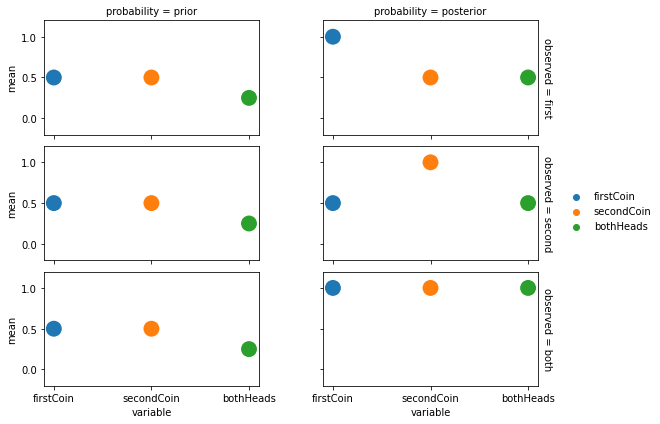

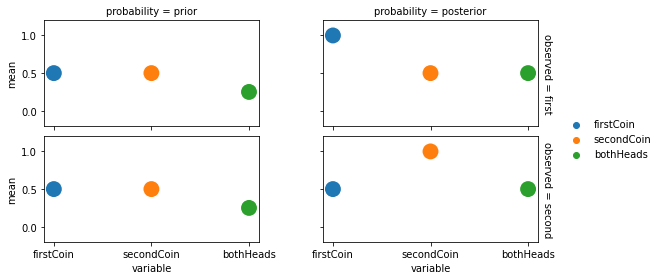

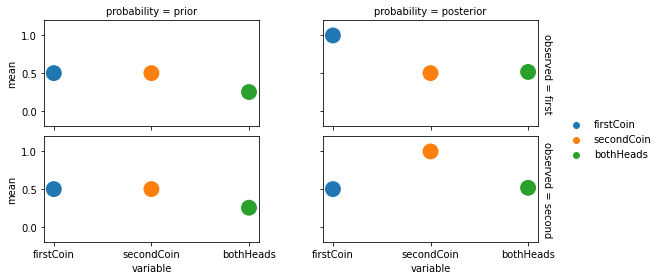

In [10]:
for inference_method in ['EP', 'VMP', 'Gibbs']:
    g = sns.FacetGrid(data=df_results[df_results.inference == inference_method], 
                      height=2, aspect=2,
                      margin_titles=True, despine=False,
                      col='probability',  
                      row='observed')
    g.map_dataframe(sns.scatterplot, 
                    x='variable', 
                    hue='variable',
                    s=300,
                    y='mean')
    g.fig.subplots_adjust(wspace=0.3, hspace=0.1)
    g.set(ylim=(-0.2, 1.2))
    g.add_legend()
    g.fig.savefig(output_dir/f'{inference_method}.png')